In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wavio
import IPython

In [2]:
def fxlms(un, dn, mu):
    """
    :param un: unknow signal(2-dimensional array). Rows are samples, columns are input arrays.
    :type  un: numpy.ndarray
    
    :param dn: expectation signal(1 dimensional array).
    :type  dn: numpy.ndarray
    
    :param M : array with initial weights (1 dimensional array) of filter size
    :type  M : numpy.ndarray
    
    :param mu: learning rate
    :type  mu: float
    
    :param n: length of filter(integer) - how many input is input array(row of input matrix)
    :type  n: int

    :return: yn, en, wn
    """
    # To ensure the length of un and dn is same
    ITER = min(len(un),len(dn)) 
    
    # Estimated Signal, FIR Product
    yn = np.zeros(ITER)
    
    # Error Signal, difference between estimation and expectation
    en = np.zeros(ITER)
    
    # Find the row of un
    _, n = np.shape(un)
    
    # FIR buffer
    wn = np.zeros(n)
    
    # History of all weights (2 dimensional array). Every row is set of the weights for given sample.
    wn_history = np.zeros((ITER, n))
    
    for k in range(ITER):
        wn_history[k,:] = wn
        yn[k] = np.dot(wn.T, un[k])
        en[k] = dn[k] - yn[k]
        dw = mu * en[k] * un[k]
        wn += dw
    return yn, en, wn_history

In [3]:
N = 500
un = np.random.normal(0, 1, (N, 4)) # input matrix - reference signal
vn = np.random.normal(0, 0.1, N) # noise - interference
dn = 2 * un[:,0] + 0.1*un[:,1] - 4*un[:,2] + 0.5*un[:,3] + vn # desired signal - reference signal with room convolution + interference
mu = 0.1

In [4]:
yn, en, wn = fxlms(un, dn, mu)

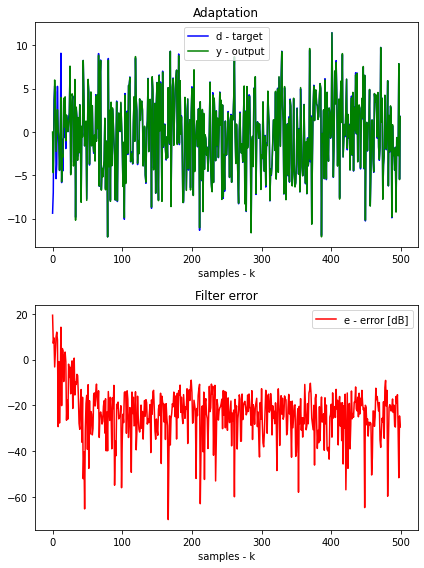

In [5]:
## show results
plt.figure(figsize=(6,8))

plt.subplot(211)
plt.title("Adaptation")
plt.xlabel("samples - k")
plt.plot(dn,"b", label="d - target")
plt.plot(yn,"g", label="y - output")
plt.legend()

plt.subplot(212)
plt.title("Filter error")
plt.xlabel("samples - k")
plt.plot(10*np.log10(en**2),"r", label="e - error [dB]")
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
music_raw = wavio.read("music/music.wav")
room_drum_raw = wavio.read("music/drum_room.wav")
drum_raw = wavio.read("music/drum.wav")

music = music_raw.data[:, 0]
music = music.astype(np.float32, order='C') / 32767.0

room_drum = room_drum_raw.data[:, 0]
room_drum = room_drum.astype(np.float32, order='C') / 32767.0

drum = drum_raw.data[:, 0]
drum = drum.astype(np.float32, order='C') / 32767.0

In [7]:
length = min(len(drum), len(room_drum))
un = np.array((drum[:length], room_drum[:length])).T
dn = music
mu = 0.1

In [8]:
yn, en, wn = fxlms(un, dn, mu)

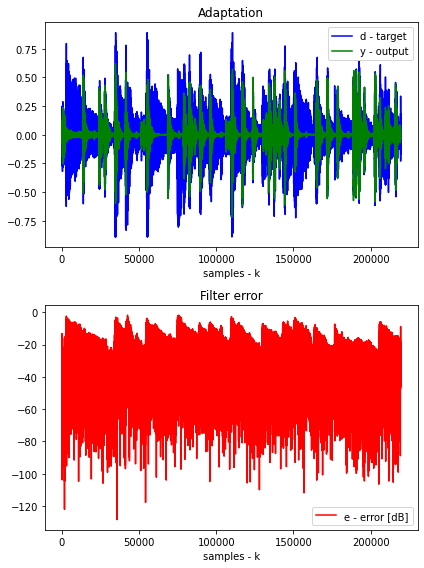

In [9]:
## show results
plt.figure(figsize=(6,8))

plt.subplot(211)
plt.title("Adaptation")
plt.xlabel("samples - k")
plt.plot(dn,"b", label="d - target")
plt.plot(yn,"g", label="y - output")
plt.legend()

plt.subplot(212)
plt.title("Filter error")
plt.xlabel("samples - k")
plt.plot(10*np.log10(en**2),"r", label="e - error [dB]")
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
sr = 16000
wavio.write("en_fxlms.wav", en, sr, sampwidth=3)
wavio.write("yn_fxlms.wav", yn, sr, sampwidth=3)
IPython.display.display(IPython.display.Audio("en_fxlms.wav", rate=sr))
IPython.display.display(IPython.display.Audio("yn_fxlms.wav", rate=sr))
IPython.display.display(IPython.display.Audio("music/music.wav", rate=sr))